### Student Information
Name: 房智宏

Student ID: 106062404

---

### Instructions

- Download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read what the dataset is about on the link provided before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation techniques learned in the [first lab session](https://goo.gl/Sg4FS1) on the new dataset. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 80% of your grade!


- After you have completed the operations, you should attempt the **bonus exercises** provided in the [notebook](https://goo.gl/Sg4FS1) we used for the first lab session. There are six (6) additional exercises; attempt them all, as it is part of your grade (10%). 


- You are also expected to tidy up your notebook and attempt new data operations that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade.


- After completing all the above tasks, you are free to remove this header block and submit your assignment following the guide provided in the `README.md` file of the assignment's [repository](https://github.com/omarsar/data_mining_hw_1). 

## 1. Data Source

### 1.1 Import Required Library

In [1]:
# Necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
# Importing the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly.plotly as py
import plotly.graph_objs as go

### 1.2 Load Dataset from Files

In [3]:
# Load the dataset from the files (Converted directly into Pandas Dataframe)
df1 = pd.read_csv('dataset/amazon_cells_labelled.txt', '\t', names = ["Sentence", "Score"])
df2 = pd.read_csv('dataset/imdb_labelled.txt', '\t', names = ["Sentence", "Score"])
df3 = pd.read_csv('dataset/yelp_labelled.txt', '\t', names = ["Sentence", "Score"])

# Checking Total Record (Each dataset should have exact 1000 record)
len(df2)

748

In [4]:
# C Engine failed to parse some of the data from imdb_labelled.txt (Bad Data)
# Fallback to Python Parser (Quick Fix)
df2 = pd.read_csv('dataset/imdb_labelled.txt', ' \t', names = ["Sentence", "Score"], engine='python', encoding=None)
len(df2)

1000

### 1.3 Verify if data parsed correctly

In [5]:
# Check if the data was read correctly
df1[:5]
#df2[:5]
#df3[:5]

,Sentence,Score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


## 1.4 Spot Bad Formatted Data
#### We may need to fix this format later on if it cause us some problem

In [6]:
# Sentence with prefix ([" ])
df2[322:323]

,Sentence,Score
322,""" I love it.",1


In [7]:
# Sentence with prefix ([) ])
df2[732:733]

,Sentence,Score
732,") a happy, wonderful, feel good ending!",1


<hr>

** Exercise 0:** Experiment with other querying techniques using pandas dataframes. Refer to the their documentation for more information. 

In [8]:
# Test query DataFrame#1 with Score value equal to 0 (query with expression)
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.query.html
df1.query('Score == 0')[0:5]
# Equivalence with df[df.Score==0][0:5]

,Sentence,Score
0,So there is no way for me to plug it in here i...,0
3,Tied to charger for conversations lasting more...,0
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
8,"Needless to say, I wasted my money.",0


<hr>

## 2.Data Preparation
#### Since we already convert the data directly into pandas dataframe earlier, the data is already well prepared for us. No need to take another significant action to prepare it. We can just try to get familiar with the data


In [9]:
# First 10 data of DataFrame3
df3[0:10][["Sentence", "Score"]]

,Sentence,Score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [10]:
# Last 10 data of DataFrame2
df2[-11:-1]

,Sentence,Score
989,":) Anyway, the plot flowed smoothly and the ma...",1
990,"The opening sequence of this gem is a classic,...",1
991,Fans of the genre will be in heaven.,1
992,Lange had become a great actress.,1
993,It looked like a wonderful story.,1
994,I never walked out of a movie faster.,0
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0


In [11]:
# Query every 10th record of DataFrame1 
df1.iloc[::10, :][0:10]

,Sentence,Score
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


## 3. Check Missing Value

#### For this step, I divide the task into 2 main task as following:
1. We first create new testing data frame to check whether our function is working properly as expected. 
2. After we are making sure that the function is working properly, we then apply it into the original data frame.

### 3.1. Testing function against Testing DataFrame
#### Notice that "empty" and "Null" are different

In [12]:
# Create New Testing Data Frame
MissingDF = pd.DataFrame([['EmptyValue', ''], ['NullValue', np.nan]], columns=['Sentence', 'Score'])

In [13]:
# Checking for Null Value
pd.isnull(MissingDF)

,Sentence,Score
0,False,False
1,False,True


In [14]:
# Checking for Empty Value
MissingDF.query('Score == ""')

,Sentence,Score
0,EmptyValue,


<hr>

**Exercise 1:** Code for how to calculate the missing values for every record instead of every column. Hint `axis` parameter. Check the documentation for more information.

In [15]:
# Also print out which line/row number where the missing value is located. [BUGGED]
def check_missing_values2(table):
    """ functions that check and verifies if there are missing values in dataframe """
    row = 0
    column = 0
    counter = 0
    for element in table:
        column+=1
        
        if element == True:
            if column == 1:
                print("Line " + str(row) + " Sentence=>" + str(element))
            else:
                print("Line " + str(row) + " Score=>" + str(element))
            counter+=1
        
        if column==2:
            # This Row Value below will back to 0 in the next loop (Not Sure why)
            # Already check it in Java, and there is no problem
            row+=1
            column=0
            
    return ("Missing Value Counter :" + str(counter))

In [16]:
pd.isnull(MissingDF).apply(lambda x: check_missing_values2(x), axis=1)

Line 0 Score=>True


0    Missing Value Counter :0
1    Missing Value Counter :1
dtype: object

#### Note that the correct function should return "Line 1 Score=>True" instead

<hr>

### 3.2. Applying the function against Original Dataframe
#### To simplify the whole process, we merge the 3 original dataframe into 1 before processing it.


In [17]:
# Merge Original Data Frame
MergeDF = pd.concat([df1, df2, df3])
len(MergeDF)

3000

In [18]:
# Original function from news_data_mining.ipynb
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

In [19]:
# Checking for Null Value
pd.isnull(MergeDF).apply(lambda x: check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
Score       (The amoung of missing records is: , 0)
dtype: object

In [20]:
# Checking for Empty Value of Score
MergeDF.query('Score == ""')

,Sentence,Score


In [21]:
# Checking for Empty Value of Sentence
MergeDF.query('Sentence == ""')

,Sentence,Score


In [22]:
# At this moment, No Missing Value detected
# In case if there is missing value, we may need to process it further
# Or for simplicity, we may remove it directly from the DataFrame
MergeDF.dropna(inplace=True)

<hr>

## 4. Remove Duplicate
#### After merging all the dataset, we may find out that some of the record are duplicated, so we may need to remove it.

In [23]:
# Checking the sum of the duplicated record
sum(MergeDF.duplicated())

17

In [24]:
# The sum of record before removing duplicate
len(MergeDF)

3000

In [25]:
# Removing just duplicate but preserving a copy of it
MergeDF.drop_duplicates(keep="first", inplace=True)

In [26]:
# The sum of record after removing duplicate
len(MergeDF)

2983

## 5. Data Preprocessing

### 5.1 Sampling & Visualizing
#### If our dataframe contains huge amount of records, it is better to sample it first before we process it, especially if we are using low-end computer

In [27]:
# Test Sampling with just 25% of the data randomly
SampleDF = MergeDF.sample(frac=0.25, replace=False)
len (SampleDF)

746

#### Exercise 2: We can also do a side by side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Look at the Plotly documents for tons of examples and ways to visualizing groups bar charts.

I must also make mention that there are other libraries for visualizing, but we are going to focus on that in the later sections. For now, we just show you what are the ways to sample and to verify the distributions of your samplings. I can't resits it, but actually, there is an easier to generate the chart we generated above using a library called matplotlib. With matplotlib, things are faster and compatability-wise it may just be the best visualization library for visualizing content extracted from dataframes. Let's quickly take a loot at the magic of matplotlib below.


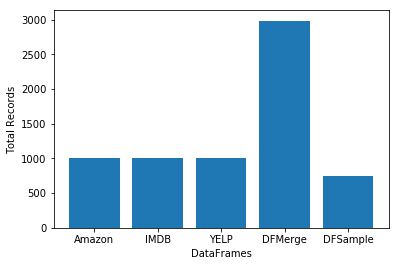

In [28]:
# Test matplotlib Bar for the sum record of each dataframe
x = np.arange(5)
recordCount = [len(df1), len(df2), len(df3), len(MergeDF), len(SampleDF)]
fig, ax = plt.subplots()
plt.bar(x, recordCount)
plt.xticks(x, ('Amazon', 'IMDB', 'YELP', 'DFMerge', 'DFSample'))
plt.xlabel('DataFrames')
plt.ylabel('Total Records')
plt.show()

In [29]:
MergeOne = MergeDF.query('Score == 1').count().Score
MergeZero = MergeDF.query('Score == 0').count().Score
SampleOne = SampleDF.query('Score == 1').count().Score
SampleZero = SampleDF.query('Score == 0').count().Score

MergeMeanZero = MergeDF.query('Score == 0').mean().Score
MergeMeanOne = MergeDF.query('Score == 1').mean().Score
SampleMeanZero = SampleDF.query('Score == 0').mean().Score
SampleMeanOne = SampleDF.query('Score == 1').mean().Score

MergeStdZero = MergeDF.query('Score == 0').std().Score
MergeStdOne = MergeDF.query('Score == 1').std().Score
SampleStdZero = SampleDF.query('Score == 0').std().Score
SampleStdOne = SampleDF.query('Score == 1').std().Score

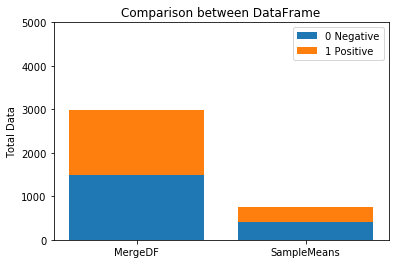

In [30]:
N = 2
ZeroSum = (MergeZero, SampleZero)
OneSum = (MergeOne, SampleOne)
ZeroStd = (MergeStdZero, SampleStdZero)
OneStd = (MergeStdOne, SampleStdOne)
ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, ZeroSum, width, yerr=ZeroStd)
p2 = plt.bar(ind, OneSum, width, bottom=ZeroSum, yerr=OneStd)

plt.ylabel('Total Data')
plt.title('Comparison between DataFrame')
plt.xticks(ind, ('MergeDF', 'SampleMeans'))
plt.yticks(np.arange(0, 5001, 1000))
plt.legend((p1[0], p2[0]), ('0 Negative', '1 Positive'))

plt.show()

#### Note that the ratio of Positive & Negative Sentence still the same after sampling

<hr>

### 5.2 Feature Creation

In [31]:
# Original function from news_data_mining.ipynb
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

In [32]:
# Run this to fix Resource 'tokenizers/punkt/PY3/english.pickle' not found.
# nltk.download('punkt')

# takes a like a minute or two to process
SampleDF['unigrams'] = SampleDF['Sentence'].apply(lambda x: tokenize_text(x))

In [33]:
SampleDF[0:4]["unigrams"]

668    [Speaking, of, the, music, ,, it, is, unbearab...
193    [I, had, a, salad, with, the, wings, ,, and, s...
763    [This, particular, model, would, not, work, wi...
132    [Headset, works, great, &, was, packaged, nice...
Name: unigrams, dtype: object

<hr>

### 5.3 Feature Subset Selection

In [34]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(SampleDF.Sentence)

In [35]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(SampleDF[4:5].Sentence)))

['loved',
 'it',
 'friendly',
 'servers',
 'great',
 'food',
 'wonderful',
 'and',
 'imaginative',
 'menu']

In [36]:
" ".join(list(SampleDF[4:5].Sentence))

'Loved it...friendly servers, great food, wonderful and imaginative menu.'

In [37]:
# We can check the shape of this matrix by:
X_counts.shape

(746, 2244)

In [38]:
# We can obtain the feature names of the vectorizer, i.e., the terms
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '20', '2160', '23', '30', '30s']

In [39]:
SampleDF[0:5]

,Sentence,Score,unigrams
668,"Speaking of the music, it is unbearably predic...",0,"[Speaking, of, the, music, ,, it, is, unbearab..."
193,"I had a salad with the wings, and some ice cre...",1,"[I, had, a, salad, with, the, wings, ,, and, s..."
763,This particular model would not work with my M...,0,"[This, particular, model, would, not, work, wi..."
132,Headset works great & was packaged nicely to a...,1,"[Headset, works, great, &, was, packaged, nice..."
55,"Loved it...friendly servers, great food, wonde...",1,"[Loved, it, ..., friendly, servers, ,, great, ..."


In [40]:
X_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [41]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [42]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

In [43]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [44]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_20',
 'term_2160',
 'term_23',
 'term_30',
 'term_30s',
 'term_375',
 'term_3o',
 'term_44',
 'term_45',
 'term_4ths',
 'term_50',
 'term_510',
 'term_5lb',
 'term_680',
 'term_700w']

In [45]:
plot_y = ["doc_"+ str(i) for i in list(SampleDF.index)[0:20]]

In [46]:
plot_z = X_counts[0:20, 0:20].toarray()

In [47]:
def plot_heat_map(plot_x, plot_y, plot_z):
    """ Helper to plot heat map """
    trace = {
        "x": plot_x,
        "y": plot_y,
        "z": plot_z,
        "colorscale": [[0.0, "rgb(158,1,66)"], [0.1, "rgb(213,62,79)"], [0.2, "rgb(244,109,67)"], [0.3, "rgb(253,174,97)"], [0.4, "rgb(254,224,139)"], [0.5, "rgb(255,255,191)"], [0.6, "rgb(230,245,152)"], [0.7, "rgb(171,221,164)"], [0.8, "rgb(102,194,165)"], [0.9, "rgb(50,136,189)"], [1.0, "rgb(94,79,162)"]],
        "type": "heatmap"
    }

    data = go.Data([trace])
    layout = {
        "legend": {
            "bgcolor": "#F5F6F9",
            "font": {"color": "#4D5663"}
        },
        "paper_bgcolor": "#F5F6F9",
        "plot_bgcolor": "#F5F6F9",
        "xaxis1": {
            "gridcolor": "#E1E5ED",
            "tickfont": {"color": "#4D5663"},
            "title": "",
            "titlefont": {"color": "#4D5663"},
            "zerolinecolor": "#E1E5ED"
        },
        "yaxis1": {
            "gridcolor": "#E1E5ED",
            "tickfont": {"color": "#4D5663"},
            "title": "",
            "titlefont": {"color": "#4D5663"},
            "zeroline": False,
            "zerolinecolor": "#E1E5ED"
        }
    }

    fig = go.Figure(data = data, layout=layout)
    return fig

In [48]:
# to plot
py.sign_in('DataMiningNTHU', 'ch8eNTh6fUr5JwagjUcd')
py.iplot(plot_heat_map(plot_x, plot_y, plot_z))


#### Exercise 3: From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it.

The great thing about what we have done so far is that we now open doors to new problems. Let us be optimistic. Even though we have the problem of sparsity and a very high dimensional data, we are now closer to uncovering wonders from the data. You see, the price you pay for the hard work is worth it because now you are gaining a lot of knowledge from what was just a list of what appeared to be irrelevant articles. Just the fact that you can blow up the data and find out interesting characteristics about the dataset in just a couple lines of code, is something that truly inspires me to practise Data Science. That's the motivation right there!

In [49]:
# Whole SampleDF
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0::]]
plot_y = ["doc_"+ str(i) for i in list(SampleDF.index)[0::]]
plot_z = X_counts[0::, 0::].toarray()

py.iplot(plot_heat_map(plot_x, plot_y, plot_z))

The draw time for this plot will be slow for all clients.


/root/anaconda3/envs/datamininghw1/lib/python3.4/site-packages/plotly/plotly/plotly.py:1443: UserWarning:

Estimated Draw Time Too Long



<hr>

### 5.4 Dimensionality Reduction

In [50]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())
X_reduced.shape

(746, 3)

In [51]:
def get_trace(X_pca, data, category, color):
    """ Build trace for plotly chart based on category """
    trace = go.Scatter3d(
        x=X_pca[data.apply(lambda x: True if x==category else False), 0],
        y=X_pca[data.apply(lambda x: True if x==category else False),1],
        z=X_pca[data.apply(lambda x: True if x==category else False),2],
        mode='markers',
        marker=dict(
            size=4,
            line=dict(
                color=color,
                width=0.2
            ),
            opacity=0.8
        ),
        text=data[data.apply(lambda x: True if x==category else False).tolist()]
    )
    return trace

In [52]:
trace1 = get_trace(X_reduced, SampleDF["Score"], "0", "rgb(71,233,163)")
trace2 = get_trace(X_reduced, SampleDF["Score"], "1", "rgb(52,133,252)")
data = [trace1, trace2]


layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

/root/anaconda3/envs/datamininghw1/lib/python3.4/site-packages/ipykernel/__main__.py:4: FutureWarning:

in the future, boolean array-likes will be handled as a boolean array index

/root/anaconda3/envs/datamininghw1/lib/python3.4/site-packages/ipykernel/__main__.py:5: FutureWarning:

in the future, boolean array-likes will be handled as a boolean array index

/root/anaconda3/envs/datamininghw1/lib/python3.4/site-packages/ipykernel/__main__.py:6: FutureWarning:

in the future, boolean array-likes will be handled as a boolean array index



<hr>

### 5.5 Atrribute Transformation / Aggregation

In [53]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [54]:
term_frequencies[0]

array([1])

In [55]:
def plot_word_frequency(word_list, plot_title):
    trace1 = {
        "x": list(word_list[0]),
        "y": list(word_list[1]),
        "type": "bar"
    }

    data = go.Data([trace1])

    layout = {
        "title": plot_title,
        "yaxis": {"title": "Frequency"}
    }

    fig = go.Figure(data = data, layout=layout)
    return fig

In [56]:
py.iplot(plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

#### Exercise 4: The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. You can try to reduce the number of terms you want to visualize as an exercise.



In [57]:
# Term frequency in range of 0~100
term_frequencies = []
for j in range(0,100):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
py.iplot(plot_word_frequency([count_vect.get_feature_names(), term_frequencies], "Term Frequency Distribution"))

#### Exercise 5: Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order.
Since we have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the math library provided by python and apply it to the array of values of the term frequency vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the discrepancies between the term frequencies are now better observable. Let us try it out.

In [58]:
def plot_word_frequency2(word_list, plot_title):
    trace1 = {
        "x": list(word_list[0]),
        "y": list(word_list[1]),
        "type": "bar",
        "orientation" : 'h'
    }

    data = go.Data([trace1])

    layout = {
        "title": plot_title,
        "xaxis": {"title": "Frequency"}
    }

    fig = go.Figure(data = data, layout=layout)
    return fig

# Term frequency in range of 0~100
term_frequencies = []
for j in range(0,100):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
py.iplot(plot_word_frequency2([term_frequencies, count_vect.get_feature_names()], "Term Frequency Distribution"))

In [59]:
# Testing with 10 frequencies
term_frequencies = []
for j in range(0,10):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

# Normalize the frequencies
normalized = ( term_frequencies-np.mean(term_frequencies) ) / np.std(term_frequencies)

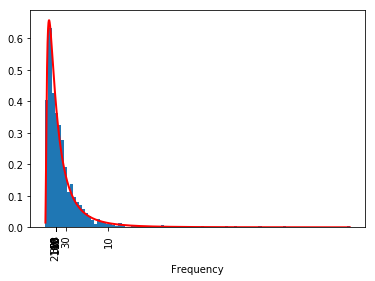

In [60]:
# Calculte Mean and Std
mu, sigma = np.mean(normalized), np.std(normalized)
s = np.random.lognormal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 100, normed=True, align='mid')
x = np.linspace(min(bins), max(bins), 10000)

pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))/ (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')
plt.axis('tight')
plt.xlabel('Frequency')

# Enable xtics text [Still Bugged]
plt.xticks((term_frequencies), (count_vect.get_feature_names()), rotation='vertical')
plt.show()

<hr>

### 5.6 Discretization and Binarization
#### Since the "Score" column of the data is already discrete value also in form of Binary, 0 for Negative and 1 for Positive, we dont need to do this part, but here is example of how to do it.

In [61]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(SampleDF.Score)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [62]:
mlb.classes_

array([0, 1])

In [63]:
SampleDF['Bin_Category'] = mlb.transform(SampleDF['Score']).tolist()

In [64]:
SampleDF[0:5]

,Sentence,Score,unigrams,Bin_Category
668,"Speaking of the music, it is unbearably predic...",0,"[Speaking, of, the, music, ,, it, is, unbearab...",[0]
193,"I had a salad with the wings, and some ice cre...",1,"[I, had, a, salad, with, the, wings, ,, and, s...",[1]
763,This particular model would not work with my M...,0,"[This, particular, model, would, not, work, wi...",[0]
132,Headset works great & was packaged nicely to a...,1,"[Headset, works, great, &, was, packaged, nice...",[1]
55,"Loved it...friendly servers, great food, wonde...",1,"[Loved, it, ..., friendly, servers, ,, great, ...",[1]
